# Image Compression
Author: Damandeep Riat


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
original_img = plt.imread('Data/rocks.jpg')

(-0.5, 735.5, 980.5, -0.5)

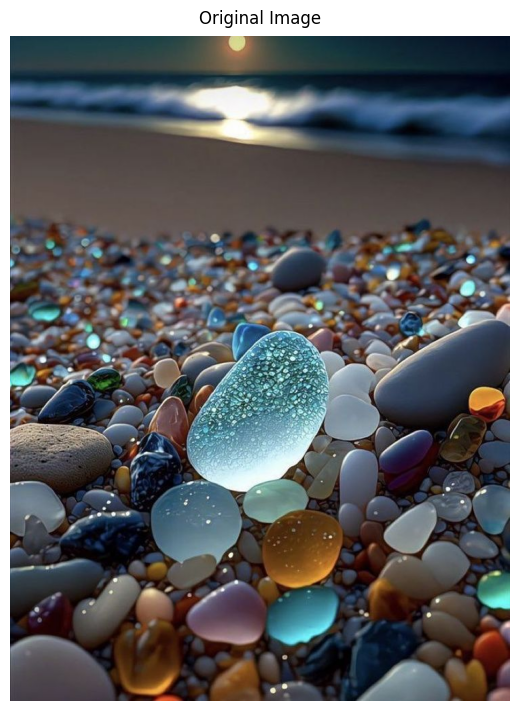

In [3]:
fig, ax = plt.subplots(constrained_layout = True)
fig.suptitle('Original Image')
fig.set_size_inches(6,7)

ax.imshow(original_img)
ax.axis(False)

In [4]:
unique_colors = len(np.unique(original_img.reshape(-1,3),axis = 0))
print(f'The number of unique colors in this image is {unique_colors}')

The number of unique colors in this image is 160310


In [5]:
# Showing 9 total pixels starting at the top left corner
print(f'The sample layout of the original image is as follows: \n{original_img[:3,:3,:]}')
print(f'The shape of the original image is: {original_img.shape}')

The sample layout of the original image is as follows: 
[[[20 52 67]
  [22 54 69]
  [24 56 71]]

 [[20 52 67]
  [22 54 69]
  [24 56 71]]

 [[21 53 68]
  [22 54 69]
  [24 56 71]]]
The shape of the original image is: (981, 736, 3)


In [6]:
# Analyze the original image size
print(f'The size of each pixel in the original image is: {original_img.itemsize *3} bytes or {original_img.itemsize * 8 * 3} bits')
print(f'The total size of the image is : {original_img.size} bytes or {original_img.size * 8} bits')

The size of each pixel in the original image is: 3 bytes or 24 bits
The total size of the image is : 2166048 bytes or 17328384 bits


In [7]:
# Reshape the image into a m x 3 array where m = 981 * 736 = 722016 examples
# Normalize RGB values from range 0-255 to 0-1 to avoid bias

X = original_img.reshape(-1,3) / 255
print(f'New shape of original image : {X.shape}',end = '\n')
print(f'First 5 pixel RGB values: \n{X[:5]}')

New shape of original image : (722016, 3)
First 5 pixel RGB values: 
[[0.07843137 0.20392157 0.2627451 ]
 [0.08627451 0.21176471 0.27058824]
 [0.09411765 0.21960784 0.27843137]
 [0.09411765 0.21960784 0.27843137]
 [0.09019608 0.21568627 0.2745098 ]]


In [8]:
# Fully Vectorized implementation of K-means. 
# Avoided using for loops as they are extraordinarily slow when computing ndarrays of size > 750000
class k_means():
    def __init__(self, X, clusters,max_iters = 15):
        self.X = X
        self.k = clusters
        self.centroids = np.zeros((clusters, X.shape[1]))
        self.idx = np.zeros(self.X.shape[0], dtype = int)

        self.train_model(max_iters)

        


    def init_centroids(self):
        random_locations = np.random.choice(len(self.X),self.k,replace = False)
        initial_centroids = self.X[random_locations,:]
        self.centroids = initial_centroids
        return initial_centroids

    def calculate_clusters(self):
        distances = np.linalg.norm(self.X[:, np.newaxis] - self.centroids, axis=2)
        self.idx = np.argmin(distances, axis=1)
        return self.idx
        

    def move_centroids(self):
        for k in range(self.k):
            if len(self.idx[self.idx == k]) ==0:
                continue
            self.centroids[k,:] =  np.mean(self.X[self.idx == k],axis =0)
        return self.centroids

    def compute_loss(self):
        loss = np.sum((self.X - self.centroids[self.idx]) ** 2, axis = 1)
        return np.mean(loss)
        


    def train_model(self,max_iters):
        self.init_centroids()
        
        loss_hist =[]
        prev_idx = None
        prev_centroids = None
        
        for i in range(max_iters):
            self.calculate_clusters()
            loss_hist.append(self.compute_loss())
            self.move_centroids()

            if prev_idx is not None and prev_centroids is not None:
                # Check if indices of clusters have not changed
                if np.array_equal(prev_idx, self.idx):
                    print(f"Converged after {i+1} iterations (indices unchanged).")
                    break
                # Check if centroids have converged within the threshold
                if np.all(np.abs(prev_centroids - self.centroids) < 0.005):
                    print(f"Converged after {i+1} iterations (centroids unchanged within threshold).")
                    break

            prev_idx = np.copy(self.idx)  
            prev_centroids = np.copy(self.centroids)  # Ensure a deep copy is made
            
        
        self.loss_hist = loss_hist

    def get_result(self):
        return self.centroids, self.loss_hist, self.idx
            
            
            
            
                
            

In [9]:
# Train 5 different models with random centeroid locations to ensure the best fit
num_learners = 5
# Compress to 15 colors
colors = 15
models = []
for i in range(num_learners):
    model = k_means(X,colors,30)
    models.append(model)
    print(f'Finished Training Model {i+1} ')


Converged after 20 iterations (centroids unchanged within threshold).
Finished Training Model 1 
Converged after 13 iterations (centroids unchanged within threshold).
Finished Training Model 2 
Converged after 14 iterations (centroids unchanged within threshold).
Finished Training Model 3 
Converged after 16 iterations (centroids unchanged within threshold).
Finished Training Model 4 
Converged after 20 iterations (centroids unchanged within threshold).
Finished Training Model 5 


In [10]:
# Pick the best model based on the losses. Picking the model with the lowest final loss after x iters
best_loss = float('inf')
best_colors = None
pixel_loc = None
for model in models:
    centroids, losses, idx = model.get_result()
    if losses[len(losses) -1 ] < best_loss:
        best_loss = losses[len(losses) -1 ]
        best_colors = centroids
        pixel_loc = idx
        


    
    

In [11]:
print(f'The best observed loss was {best_loss}')

The best observed loss was 0.006728189443898101


In [12]:
# The compressed colors chosen by the algorithm
best_colors 

array([[0.67658532, 0.46311456, 0.24886553],
       [0.23145195, 0.23109292, 0.2458261 ],
       [0.23123781, 0.12921663, 0.08327411],
       [0.06772983, 0.04974894, 0.07291623],
       [0.39114296, 0.36892794, 0.37330519],
       [0.41399662, 0.24888483, 0.11676905],
       [0.48224808, 0.60137439, 0.64565835],
       [0.47171723, 0.48969317, 0.50888417],
       [0.57954649, 0.8107217 , 0.84721221],
       [0.69756649, 0.68432903, 0.65055638],
       [0.33374156, 0.29648978, 0.28754765],
       [0.89170591, 0.93970127, 0.92521439],
       [0.20676367, 0.30350195, 0.385641  ],
       [0.29487313, 0.43283685, 0.52062706],
       [0.09618499, 0.16874354, 0.22492992]])

In [13]:
print(f'The cluster assignments of each pixel are {idx}')

The cluster assignments of each pixel are [9 8 8 ... 4 4 4]


(-0.5, 735.5, 980.5, -0.5)

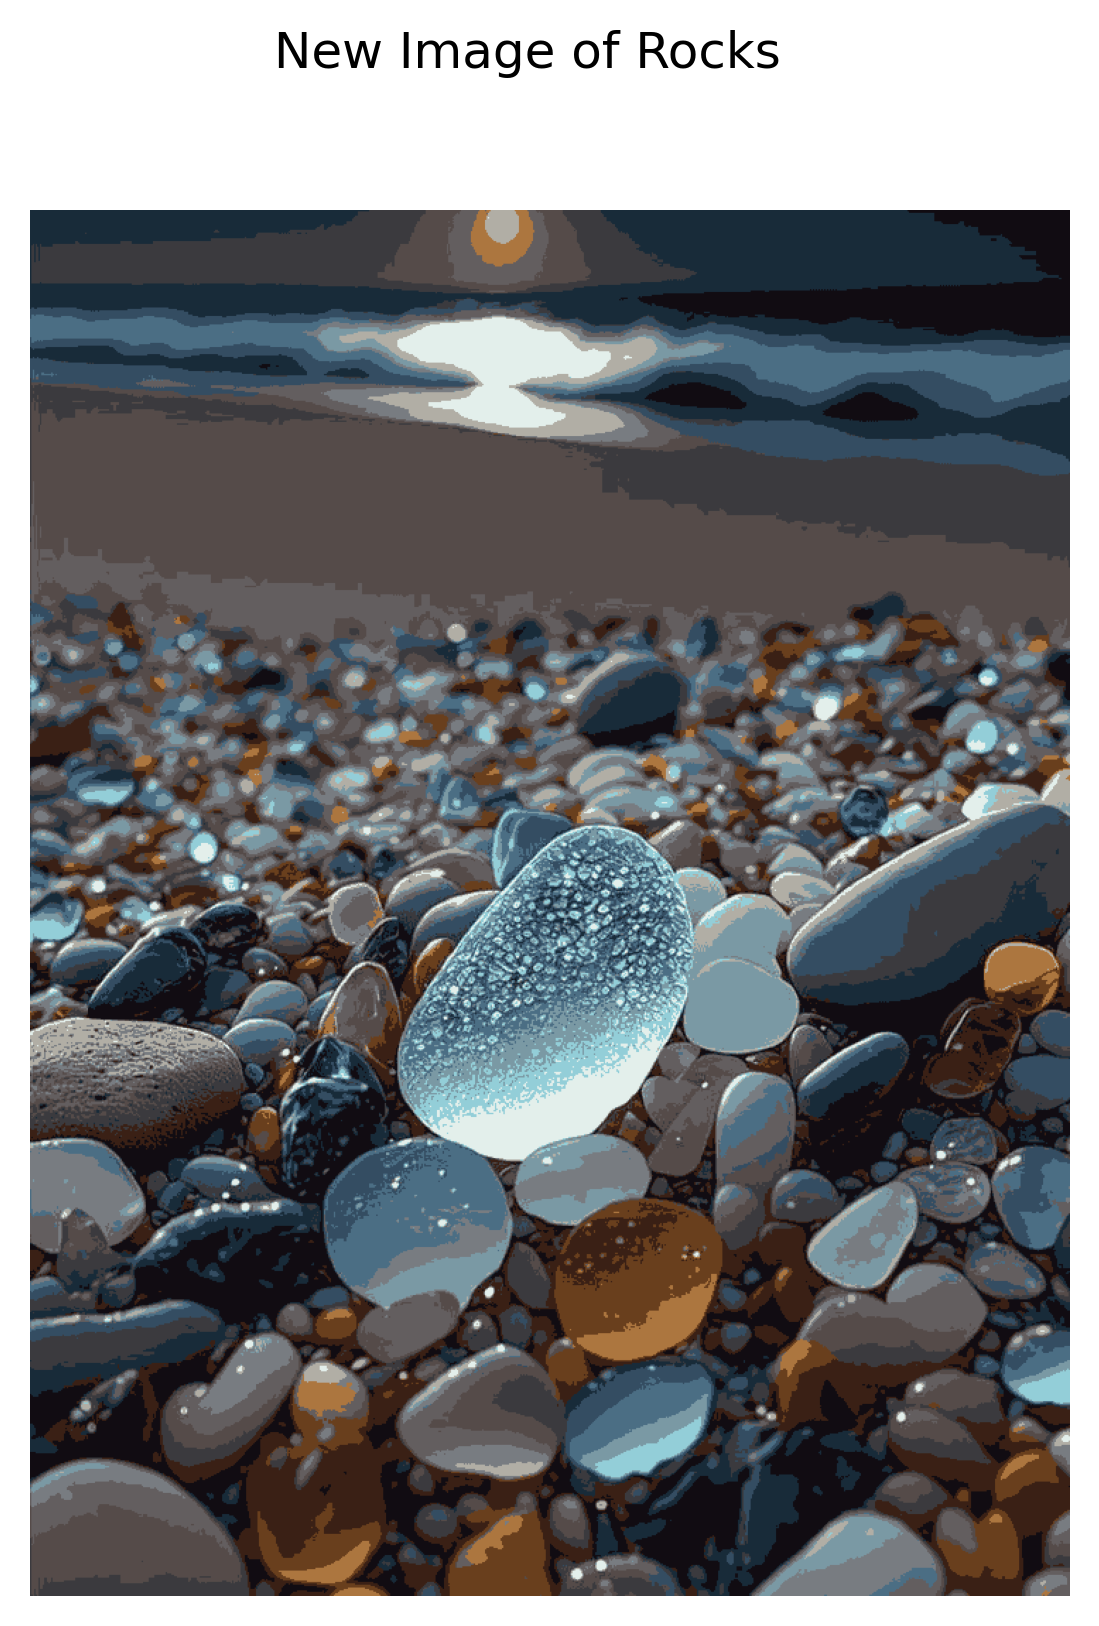

In [14]:
new_img = best_colors[pixel_loc].reshape(981,736,3)
fig, ax = plt.subplots()

fig.suptitle('New Image of Rocks')
fig.set_size_inches(6,6)
fig.set_dpi(300)

ax.imshow(new_img)
ax.axis(False)

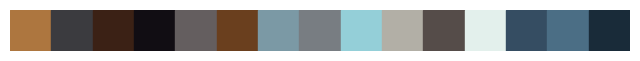

In [15]:
# Example RGB values
rgb_values = best_colors
# Normalize RGB values to range [0, 1] for matplotlib
rgb_values_normalized = np.array(rgb_values) 

# Create a plot to display colors
fig, ax = plt.subplots(figsize=(8, 2))

# Remove axes
ax.set_axis_off()

# Create patches
for i, color in enumerate(rgb_values_normalized):
    rect = plt.Rectangle((i, 0), 1, 1, color=color)
    ax.add_patch(rect)

# Set limits and aspect
ax.set_xlim(0, len(rgb_values))
ax.set_ylim(0, 1)
ax.set_aspect('equal')

plt.show()

In [16]:
fluids_orig = plt.imread('Data/fluids.jpg')


In [17]:
len(np.unique(fluids_orig.reshape(-1,3),axis = 0))

230720

(-0.5, 625.5, 625.5, -0.5)

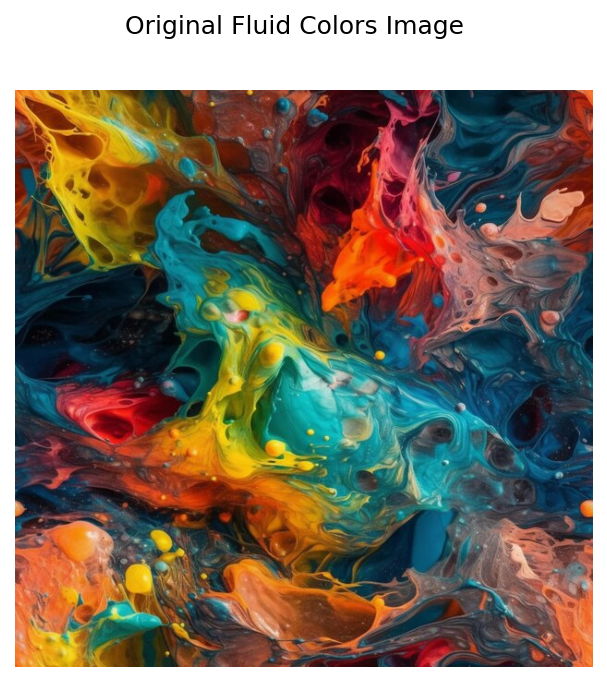

In [18]:
fig, ax = plt.subplots()

fig.suptitle('Original Fluid Colors Image')

fig.set_size_inches(5,5)
fig.set_dpi(150)

ax.imshow(fluids_orig)
ax.axis(False)

In [19]:
fluids_orig.shape

(626, 626, 3)

In [20]:
fluids = fluids_orig.reshape(-1,3) / 255

In [21]:
fluids.shape

(391876, 3)

In [22]:
num_learners = 5
colors =12
models = []
for i in range(num_learners):
    model = k_means(fluids,colors,30)
    models.append(model)
    print(f'Finished Training Model {i+1} ')


Converged after 18 iterations (centroids unchanged within threshold).
Finished Training Model 1 
Converged after 15 iterations (centroids unchanged within threshold).
Finished Training Model 2 
Converged after 24 iterations (centroids unchanged within threshold).
Finished Training Model 3 
Converged after 22 iterations (centroids unchanged within threshold).
Finished Training Model 4 
Finished Training Model 5 


In [23]:
best_loss = float('inf')
best_colors = None
pixel_loc = None
for model in models:
    centroids, losses, idx = model.get_result()
    if losses[-1] < best_loss:
        best_loss = losses[-1]
        best_colors = centroids
        pixel_loc = idx
        


In [24]:
for model in models:
    centroids, losses, idx = model.get_result()
    print(losses)

[0.03571600862890943, 0.021709278991607954, 0.0202273858876883, 0.019436982490891316, 0.01888587373439016, 0.018489316864389142, 0.018208974790808106, 0.01801204137773212, 0.017875798949553972, 0.017776334864135285, 0.017699218646832923, 0.017636405718938455, 0.01758294604870161, 0.01753596924428485, 0.017492497143327818, 0.017451498665963537, 0.017414356528051605, 0.017381636513050597]
[0.029441782950046867, 0.020592998521142467, 0.01922354599880249, 0.01846869426610479, 0.017886692167801133, 0.017536809728800857, 0.01738640184430901, 0.01731905851052379, 0.01728325474961253, 0.0172617993506953, 0.01724789808995526, 0.017237954848023353, 0.017230452752240513, 0.01722400538702064, 0.017217971998608025]
[0.04043292005734507, 0.02246448177093299, 0.020426439291157575, 0.01955993844034512, 0.019064813882401735, 0.018715583569146932, 0.01840605225684106, 0.018101095664489263, 0.017822968218619957, 0.01759944465774427, 0.017423927857121775, 0.01729840928463166, 0.017215485111420466, 0.01716

Text(0.5, 0.98, 'Compressed Image of Fluids')

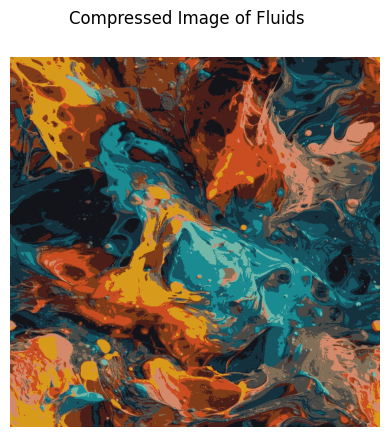

In [25]:
new_img = best_colors[pixel_loc].reshape(626,626,3)
plt.imshow(new_img)
plt.axis(False)
plt.suptitle('Compressed Image of Fluids')
    
    

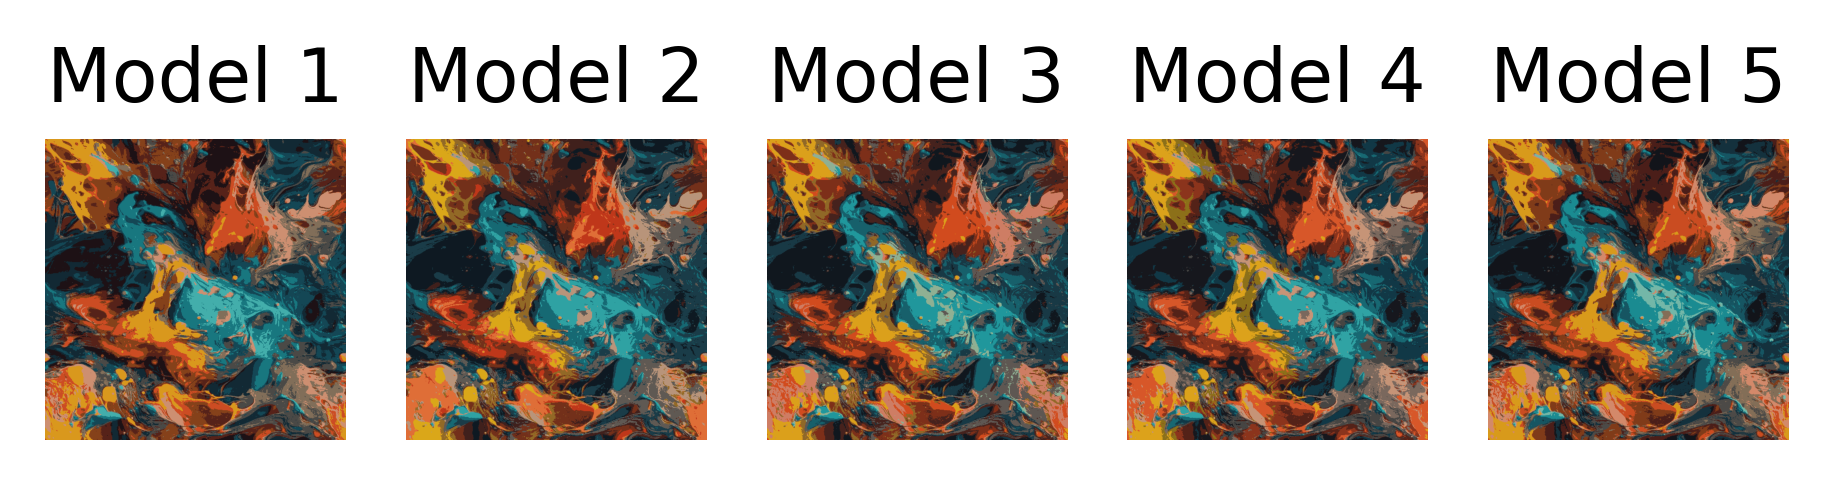

In [26]:
fig, ax = plt.subplots(1, num_learners)
fig.set_size_inches(5,5)
fig.set_dpi(450)
for i in range(num_learners):
    centroids, losses, idx = models[i].get_result()
    new_img = centroids[idx].reshape(626,626,3)
    
    
    ax[i].set_title(f'Model {i+1}')
   
    
    ax[i].imshow(new_img)
    ax[i].axis(False)

In [27]:
best_colors

array([[0.29616984, 0.12113378, 0.09819975],
       [0.30089893, 0.29261189, 0.2792246 ],
       [0.07950805, 0.19523084, 0.24310985],
       [0.45293638, 0.72037154, 0.65915432],
       [0.10542504, 0.54533396, 0.5709263 ],
       [0.07383197, 0.08232104, 0.10476086],
       [0.82781186, 0.53833238, 0.41766301],
       [0.79403519, 0.29859234, 0.13089672],
       [0.08762997, 0.33651111, 0.38573531],
       [0.84915652, 0.60458324, 0.10769333],
       [0.50361728, 0.23503589, 0.10063753],
       [0.51707592, 0.43182777, 0.34194685]])

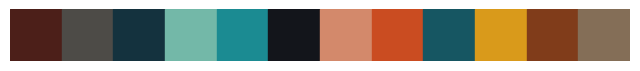

In [28]:
# Example RGB values
rgb_values = best_colors
# Normalize RGB values to range [0, 1] for matplotlib
rgb_values_normalized = np.array(rgb_values) 

# Create a plot to display colors
fig, ax = plt.subplots(figsize=(8, 2))

# Remove axes
ax.set_axis_off()

# Create patches
for i, color in enumerate(rgb_values_normalized):
    rect = plt.Rectangle((i, 0), 1, 1, color=color)
    ax.add_patch(rect)

# Set limits and aspect
ax.set_xlim(0, len(rgb_values))
ax.set_ylim(0, 1)
ax.set_aspect('equal')

plt.show()